In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, binom, norm
import scipy.stats as stats

# Autoreload of the files
%load_ext autoreload
%autoreload 2

In [3]:
path = '/Users/gaspardvilla/Local/NAT/nat_ada'
# Create the data folder if it doesn't exist
os.makedirs(path, exist_ok=True)
os.makedirs(f"{path}/slides_images", exist_ok=True)
os.makedirs(f"{path}/slides_images/15_05_2025", exist_ok=True)

# T-test
***

In [4]:
import pandas as pd
from scipy.stats import ttest_ind

# Sample Data
df = pd.DataFrame({
    'monthly_charges': [20, 22, 21, 23, 50, 52, 48, 51],
    'churn': [0, 0, 0, 0, 1, 1, 1, 1]
})

# Split groups
group0 = df[df['churn'] == 0]['monthly_charges']
group1 = df[df['churn'] == 1]['monthly_charges']

# Perform independent t-test
t_stat, p_val = ttest_ind(group0, group1)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

# Decision
if p_val < 0.05:
    print("Feature 'monthly_charges' is significantly different between groups → keep it.")
else:
    print("No significant difference → consider dropping.")

T-statistic: -26.858
P-value: 0.0000
Feature 'monthly_charges' is significantly different between groups → keep it.


# Correlation
***


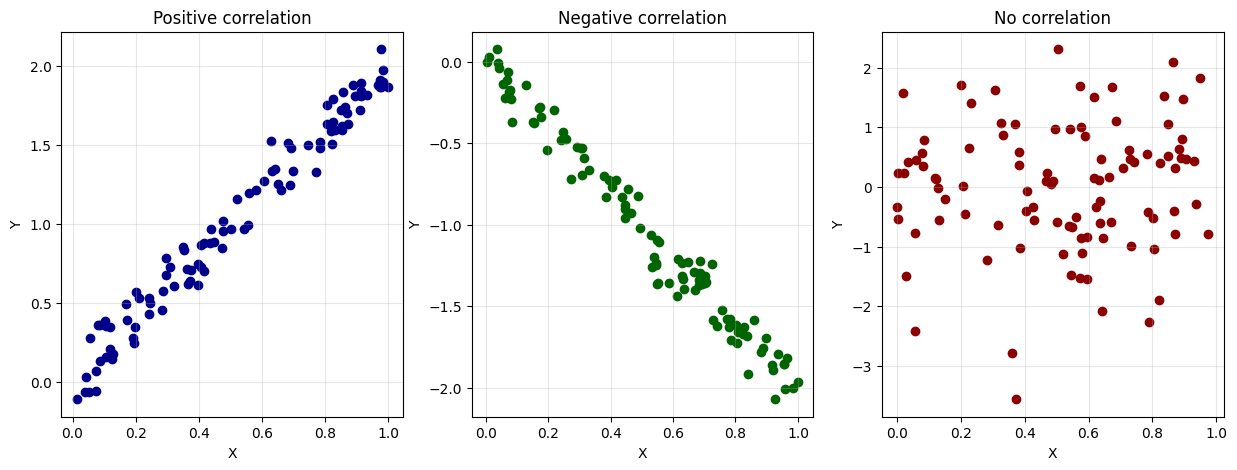

In [5]:
# Example of positive, none, and negative correlation
# Generate random data
x = np.random.rand(100)
y = 2 * x + np.random.normal(0, 0.1, 100)

# Plot the data
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(x, y, color='darkblue')
plt.grid(alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Positive correlation')

# Generate negative correlation
x = np.random.rand(100)
y = -2 * x + np.random.normal(0, 0.1, 100)

# Plot the data
plt.subplot(1, 3, 2)
plt.scatter(x, y, color='darkgreen')
plt.grid(alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Negative correlation')

# Generate no correlation
x = np.random.rand(100)
y = np.random.normal(0, 1, 100)

# Plot the data
plt.subplot(1, 3, 3)
plt.scatter(x, y, color = 'darkred')
plt.grid(alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('No correlation')
plt.savefig(f'{path}/slides_images/15_05_2025/correlation.png')
plt.show()


# Correlation matrix
***

In [6]:
# Create a small DataFrame with 4 features
np.random.seed(42)
data = {
    'A': np.random.normal(0, 1, 100),
    'B': np.random.normal(1, 1, 100),
    'C': np.random.normal(2, 1, 100),
    'D': np.random.normal(3, 1, 100)
}

df = pd.DataFrame(data)

# Introduce some correlation
df['B'] = df['A'] * 0.8 + np.random.normal(0, 0.5, 100)
df['C'] = -df['A'] * 0.5 + np.random.normal(0, 0.5, 100)

      A     B     C     D
A  1.00  0.78 -0.75 -0.17
B  0.78  1.00 -0.63 -0.01
C -0.75 -0.63  1.00  0.16
D -0.17 -0.01  0.16  1.00


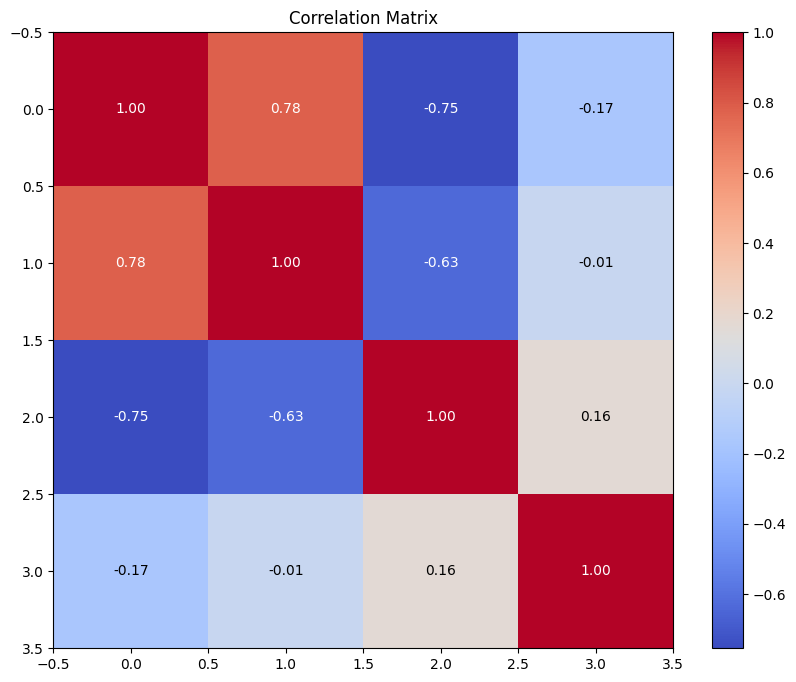

In [7]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# print the correlation matrix
print(corr_matrix.round(2))

plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix')

# Annotate each cell with the correlation coefficient
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", 
                 ha='center', va='center', color='black' if abs(corr_matrix.iloc[i, j]) < 0.5 else 'white')

plt.savefig(f'{path}/slides_images/15_05_2025/correlation_matrix.png')
plt.show()


# Multi scatter plot
***

In [8]:
# Get color scale 'coolwarm' for values between -1 and 1
cmap = plt.get_cmap('coolwarm')
cmap(0.5)
corr = corr_matrix.to_numpy()

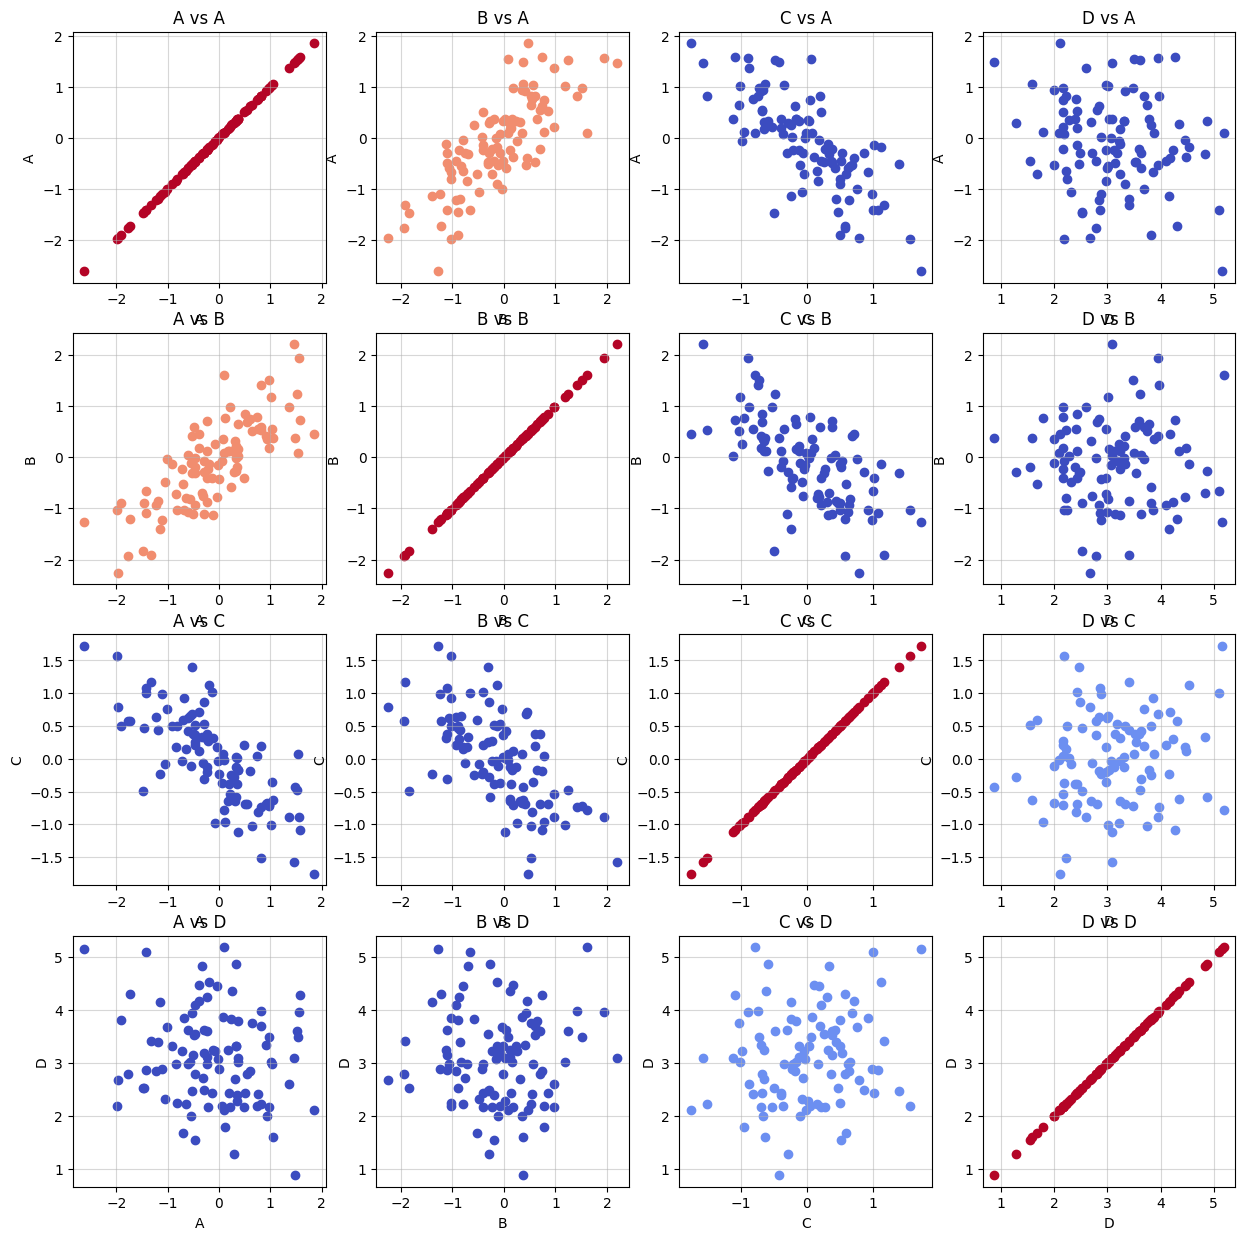

In [9]:
# Multi scatter plot
fig = plt.figure(figsize=(15,15))
ax = fig.subplots(4, 4)
corr = corr_matrix.to_numpy()
for i in range(4):
    for j in range(4):
        ax[i, j].scatter(df[df.columns[j]], df[df.columns[i]], color = cmap(corr[j][i]))
        ax[i, j].set_xlabel(df.columns[j])
        ax[i, j].set_ylabel(df.columns[i])
        ax[i, j].set_title(f'{df.columns[j]} vs {df.columns[i]}')
        ax[i, j].grid(True, alpha=0.5)
plt.show()

# Icecream sales vs temperature
***

Correlation between ice cream sales and drowning deaths: 0.96


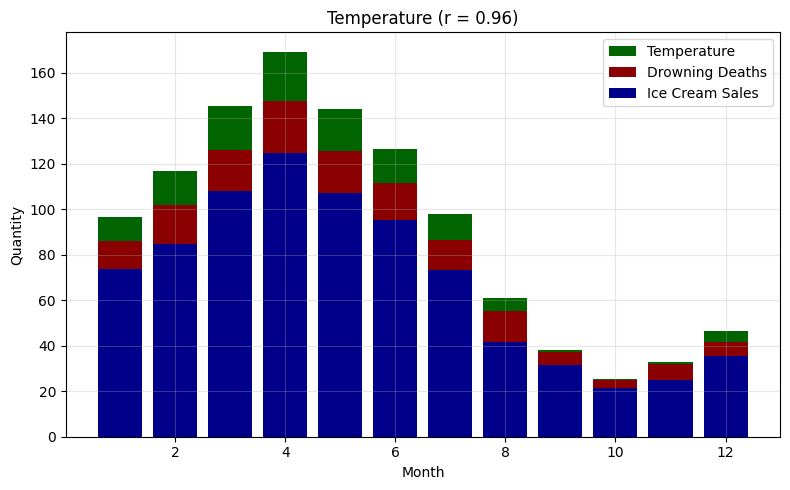

In [10]:
df = pd.read_csv(f"{path}/data/ice_cream_sales_drowning_deaths_temperature.csv")

# Compute correlation
correlation = df[['Temperature', 'DrowningDeaths']].corr().iloc[0, 1]
print(f"Correlation between ice cream sales and drowning deaths: {correlation:.2f}")

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df['Month'], df['Temperature'] + df['DrowningDeaths'] + df['IceCreamSales'], label='Temperature', color='darkgreen')
plt.bar(df['Month'], df['DrowningDeaths'] + df['IceCreamSales'], label='Drowning Deaths', color='darkred')
plt.bar(df['Month'], df['IceCreamSales'], label='Ice Cream Sales', color='darkblue')
plt.title(f"Temperature (r = {correlation:.2f})")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{path}/slides_images/15_05_2025/ice_cream_sales_drowning_deaths.png")
plt.show()

# Nonlinear relationships
***

Pearson correlation: 0.006


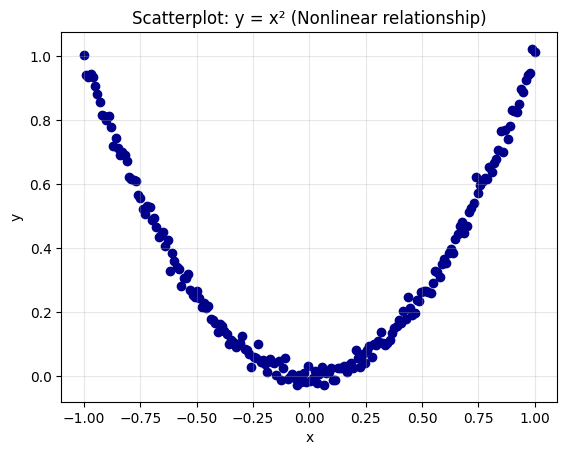

In [11]:
df = pd.read_csv(f"{path}/data/non_linear_relationship.csv")
x = df['x']
y = df['y']

# Pearson correlation
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f"Pearson correlation: {r:.3f}")

# Plot
plt.scatter(x, y, color='darkblue')
plt.title("Scatterplot: y = x² (Nonlinear relationship)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.savefig(f"{path}/slides_images/15_05_2025/non_linear_relationship.png")
plt.show()

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import mutual_info_regression

# Load dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseVal")

In [13]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


/var/folders/dc/28gdnyt16qg7f_cvxzb49rxc0000gn/T/ipykernel_21536/1043384262.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette="RdYlBu")


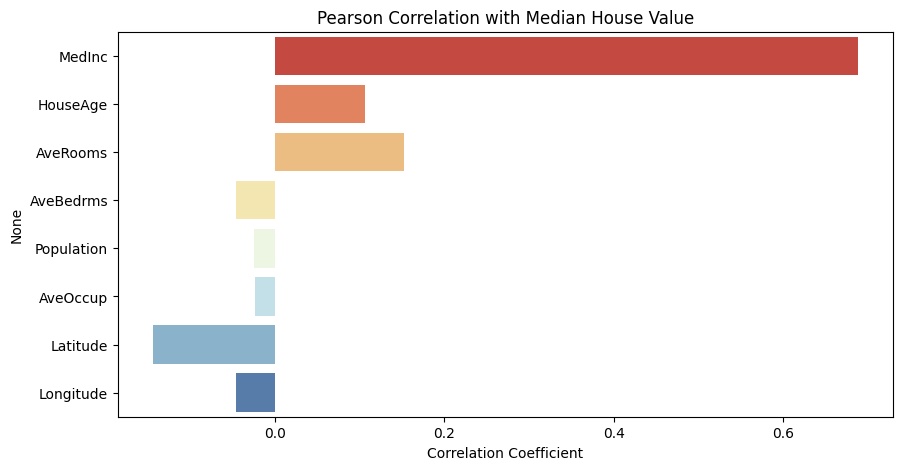

Top 5 Features by Pearson Correlation: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']


In [14]:
# Pearson correlation with target
correlation = X.corrwith(y)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation.values, y=correlation.index, palette="RdYlBu")
plt.title("Pearson Correlation with Median House Value")
plt.xlabel("Correlation Coefficient")
plt.savefig(f'{path}/slides_images/15_05_2025/california_correlation.png')
plt.show()

# Top 5 features
top_corr_features = correlation.abs().sort_values(ascending=False).head(5).index.tolist()
print("Top 5 Features by Pearson Correlation:", top_corr_features)

/var/folders/dc/28gdnyt16qg7f_cvxzb49rxc0000gn/T/ipykernel_21536/3101307897.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette="YlOrRd")


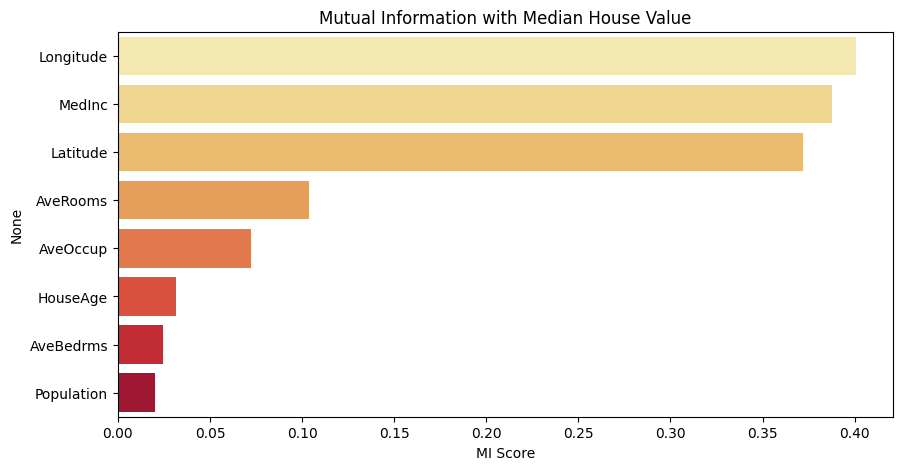

Top 5 Features by Mutual Information: ['Longitude', 'MedInc', 'Latitude', 'AveRooms', 'AveOccup']


In [15]:
# Compute mutual information
mi_scores = mutual_info_regression(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=mi_series.values, y=mi_series.index, palette="YlOrRd")
plt.title("Mutual Information with Median House Value")
plt.xlabel("MI Score")
plt.savefig(f'{path}/slides_images/15_05_2025/california_mi.png')
plt.show()

# Top 5 features
top_mi_features = mi_series.head(5).index.tolist()
print("Top 5 Features by Mutual Information:", top_mi_features)

# Feature selection
***

In [16]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target